In [ ]:
from kalpana.export import dzDatum
## vyperdatum only works on windows ()
from vyperdatum.points import VyperPoints
import matplotlib.pyplot as plt
import cmocean

In [3]:
## fort.14 path
f14 = r"C:\Users\tacuevas\Downloads\NCSC_SAB_123.14"

In [4]:
## read nodes from fort.14 (x, y, z)
with open(f14) as fin:
    head = list(islice(fin, 2))
    data = [int(x) for x in head[1].split()]
nodes = np.loadtxt(f14, skiprows = 2, max_rows = data[1], usecols = (1, 2, 3))

In [5]:
## find the dz between mean sea level and navd88 for ech mesh node
t0 = time.time()
df = dzDatum2(r'T:\Projects\2016-2020-DHS-CRCoE\Tomas\vdatum', 
             nodes[:, 0], 
             nodes[:, 1], 
             r'NCSC_SAB_123_msl2navd88.pkl', pkg = VyperPoints)
print(f'{(time.time() - t0)/60}')

3.7149710257848105


In [6]:
df.head()

,x,y,dz,area
0,-90.427234,30.135214,0.124,0
1,-90.426874,30.131148,0.123,0
2,-90.426596,30.126747,0.123,0
3,-90.428535,30.164890,0.128,0
4,-90.429371,30.160986,0.128,0


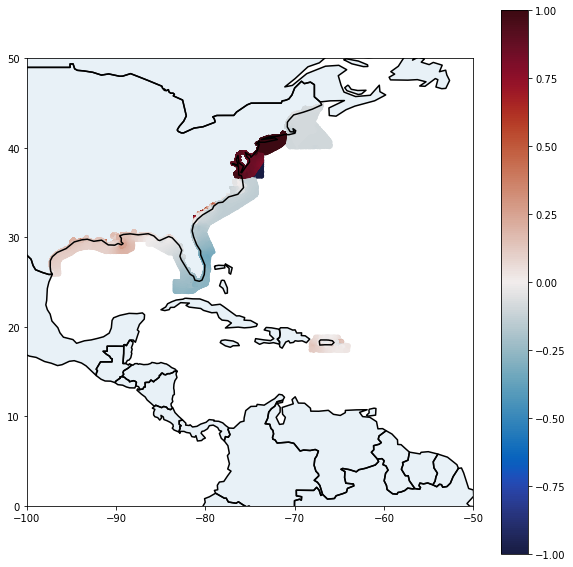

In [8]:
## quick visualization of the vertical difference between datums
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
normalize = mpl.colors.Normalize(vmin=-1, vmax=1)
fig, ax = plt.subplots(figsize = (10, 10))
world.boundary.plot(ax = ax, color = 'k')
world.plot(ax = ax, alpha = 0.1)
sc = ax.scatter(df['x'], df['y'], c = df['dz'], cmap = cmocean.cm.balance, s = 5, norm = normalize)
ax.set_xlim([-100, -50])
ax.set_ylim([0, 50])
plt.colorbar(sc)